In [65]:
import pandas_datareader as pdr

In [84]:
df=pdr.get_data_tiingo('AAPL',api_key=key)

C:\Users\91977\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [85]:
df.to_csv('AAPL.csv')

In [86]:
import pandas as pd

In [87]:
df=pd.read_csv('AAPL.csv')

In [100]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-02 00:00:00+00:00,187.18,187.30,183.42,183.82,17731343,44.717057,44.745725,43.818798,43.914358,70925372,0.0,1.0
1,AAPL,2018-07-03 00:00:00+00:00,183.92,187.95,183.54,187.79,13954806,43.938248,44.901009,43.847466,44.862785,55819224,0.0,1.0
2,AAPL,2018-07-05 00:00:00+00:00,185.40,186.41,184.28,185.26,16604248,44.291818,44.533105,44.024251,44.258372,66416992,0.0,1.0
3,AAPL,2018-07-06 00:00:00+00:00,187.97,188.43,185.20,185.42,17485245,44.905787,45.015681,44.244038,44.296596,69940980,0.0,1.0
4,AAPL,2018-07-09 00:00:00+00:00,190.58,190.68,189.30,189.50,19756634,45.529313,45.553203,45.223522,45.271302,79026536,0.0,1.0


In [101]:
df1=df.reset_index()['close']

In [102]:
df1.head()

0    187.18
1    183.92
2    185.40
3    187.97
4    190.58
Name: close, dtype: float64

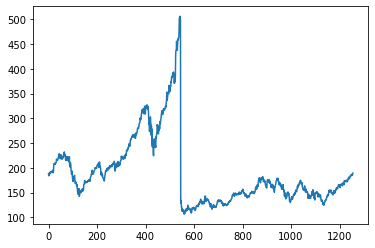

In [103]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [104]:
## LSTM are sensitive to the scale of the data, so we apply MinMax scaler

In [105]:
import numpy as np

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [107]:
df1.shape

(1256, 1)

## whenever dealing with time series data
we should try to divide the data based on day
because the next data is depend upon the previous data in case of time series data

In [108]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [113]:
# Data Preprocessing
# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ### i=0, 0,1,2,3
        dataX.append(a);
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [117]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [119]:
print(X_train.shape)

(715, 100)


In [120]:
y_train.shape

(715,)

In [121]:
# reshape X_train into 3d
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [122]:
### Creating the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [123]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [124]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 191ms/step - loss: 0.0403 - val_loss: 0.0020
Epoch 2/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0134 - val_loss: 0.0010
Epoch 3/100
12/12 [==============================] - 2s 126ms/step - loss: 0.0095 - val_loss: 4.2171e-04
Epoch 4/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0090 - val_loss: 3.2195e-04
Epoch 5/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0077 - val_loss: 6.0356e-04
Epoch 6/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0071 - val_loss: 2.7414e-04
Epoch 7/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0103 - val_loss: 0.0043
Epoch 8/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0085 - val_loss: 6.7302e-04
Epoch 9/100
12/12 [==============================] - 2s 126ms/step - loss: 0.0066 - val_loss: 3.7685e-04
Epoch 10/100
12/12 [==============================] - 2s 135ms/step

12/12 [==============================] - 2s 135ms/step - loss: 0.0024 - val_loss: 2.0453e-04
Epoch 79/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0018 - val_loss: 2.0699e-04
Epoch 80/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0016 - val_loss: 1.9556e-04
Epoch 81/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0016 - val_loss: 2.2133e-04
Epoch 82/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0015 - val_loss: 2.4922e-04
Epoch 83/100
12/12 [==============================] - 2s 139ms/step - loss: 0.0015 - val_loss: 1.9673e-04
Epoch 84/100
12/12 [==============================] - 2s 166ms/step - loss: 0.0013 - val_loss: 2.0653e-04
Epoch 85/100
12/12 [==============================] - 2s 155ms/step - loss: 0.0013 - val_loss: 1.9368e-04
Epoch 86/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0013 - val_loss: 2.1641e-04
Epoch 87/100
12/12 [==============================] - 2s 14

In [141]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 21ms/step


In [142]:
#transfromback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [143]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.2939637589354

In [144]:
math.sqrt(mean_squared_error(y_test,test_predict))

155.5513052427206

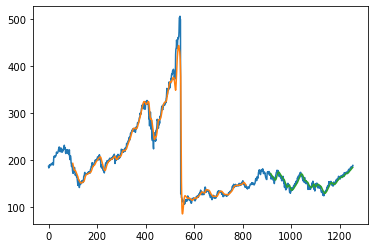

In [145]:
## plotting
# shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

# shift test predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+look_back*2+1:len(df1)-1,:]=test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# predict the future 10 days

In [146]:
len(test_data)

440

In [158]:
x_input=test_data[340:].reshape(1,-1) # taking previous 100 days data
x_input.shape

(1, 100)

In [159]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [160]:
#temp_input

In [165]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) # adding the output to input
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

0 day input [0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.19644333 0.20343143 0.20641202 0.19746828 0.19842301 0.1989764
 0.19924296 0.19933718 0.19933847 0.1992936  0.19922753 0.19915257
 0.19907489 0.19899753 0.19892216 0.1988499  0.19878142 0.19871706
 0.1986571  0.19860151 0.19855008 0.19850251 0.1984

8 day output [[0.19773558]]
9 day input [0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809
 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211
 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202
 0.19746828 0.19842301 0.1989764  0.19924296 0.19933718 0.19933847
 0.1992936  0.19922753 0.19915257 0.19907489 0.19899753 0.19892216
 0.1988499  0.19878142 0.19871706 0.1986571  0.19860151 0.19855008
 0.19850251 0.19845843 0.19841728 0.1983787  0.19834211 0.19830707
 0.19827315 0.19823997 0

18 day output [[0.1973149]]
19 day input [0.14935504 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236
 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
 0.20343143 0.20641202 0.19746828 0.19842301 0.1989764  0.19924296
 0.19933718 0.19933847 0.1992936  0.19922753 0.19915257 0.19907489
 0.19899753 0.19892216 0.1988499  0.19878142 0.19871706 0.1986571
 0.19860151 0.19855008 0.19850251 0.19845843 0.19841728 0.1983787
 0.19834211 0.19830707 0.19827315 0.19823997 0.19820711 0.19817427
 0.19814126 0.19810784 0.19807383 0.19803923 0.19800387 0.19796775
 0.19793087 0.19789316 0

28 day output [[0.19688717]]
29 day input [0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566
 0.17179712 0.1764809  0.17635567 0.183469   0.18562304 0.18219161
 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413
 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646
 0.19997495 0.19644333 0.20343143 0.20641202 0.19746828 0.19842301
 0.1989764  0.19924296 0.19933718 0.19933847 0.1992936  0.19922753
 0.19915257 0.19907489 0.19899753 0.19892216 0.1988499  0.19878142
 0.19871706 0.1986571  0.19860151 0.19855008 0.19850251 0.19845843
 0.19841728 0.1983787  0.19834211 0.19830707 0.19827315 0.19823997
 0.19820711 0.19817427 0.19814126 0.19810784 0.19807383 0.19803923
 0.19800387 0.19796775 0.19793087 0.19789316 0.19785473 0.19781564
 0.1977759  0.19773558 0.19769481 0.19765356 0.19761196 0.19757006
 0.19752789 0.197485

In [167]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [168]:
import matplotlib.pyplot as plt

In [171]:
df3=df1.tolist()
df3.extend(lst_output)
len(df1)

1256

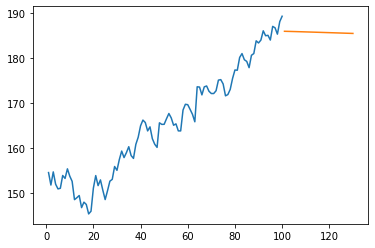

In [172]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:])) #previous 100 data
plt.plot(day_pred,scaler.inverse_transform(lst_output))